# Project 01

**Submitted by: Diego Sol**

CSCE 636-600: Deep Learning

Professor: Dr. Anxiao Jiang

Mount Google Drive to this notebook to easily access training data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import packages

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Download training images and labels

In [3]:
all_images = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_images', 'rb'))
all_labels = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_labels', 'rb'))

Split the data into training and validation sets

In [4]:
data_split = 50000

train_images = all_images[:data_split,:,:]
train_labels = all_labels[:data_split,]

test_images = all_images[data_split:,:,:]
test_labels = all_labels[data_split:,]

In [219]:
data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

data_augmentation.build(input_shape=(28,28))
data_augmentation.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_16 (RandomR  (28, 28)                 0         
 otation)                                                        
                                                                 
 random_zoom_16 (RandomZoom)  (28, 28)                 0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


Create a function to build the mask model and predictive model

In [221]:
def build_model():
  inputs = keras.Input(shape=(28, 28, 1))
  x = data_augmentation(inputs)
  x = layers.Rescaling(1./255)(inputs)

  # convolutional and  max pooling layers
  x = layers.Conv2D(32, 3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(64, 3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)

  x = layers.Flatten()(x)
  x = layers.Dropout(0.5)(x)

  outputs = layers.Dense(10, activation="softmax")(x)

  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

  return model

In [222]:
model = build_model()
model.summary()
# keras.utils.plot_model(model, show_shapes=True, to_file="simple_convnet.png")

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 rescaling_31 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_112 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_113 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                     

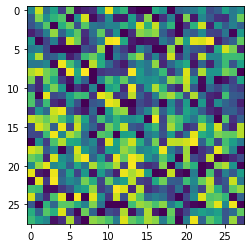

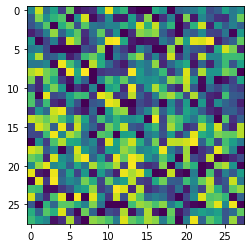

In [223]:
original_image = train_images[0]
augmented_image = data_augmentation(original_image)

plt.figure()
plt.imshow(original_image.numpy().astype("uint8"))

plt.figure()
plt.imshow(augmented_image.numpy().astype("uint8"))

In [224]:
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath="noisy_MNIST_convnet.keras",
                      monitor="val_loss",
                      save_best_only=True
                  )]

In [225]:
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    validation_split=0.4,
                    batch_size=32,
                    callbacks=callbacks_list)

Epoch 1/50
938/938 [==============================] - 13s 12ms/step - loss: 2.1779 - accuracy: 0.1988 - val_loss: 1.9746 - val_accuracy: 0.2952
Epoch 2/50
938/938 [==============================] - 11s 12ms/step - loss: 1.8817 - accuracy: 0.3389 - val_loss: 1.6891 - val_accuracy: 0.4240
Epoch 3/50
938/938 [==============================] - 11s 11ms/step - loss: 1.6519 - accuracy: 0.4274 - val_loss: 1.4996 - val_accuracy: 0.4877
Epoch 4/50
938/938 [==============================] - 11s 12ms/step - loss: 1.5238 - accuracy: 0.4773 - val_loss: 1.4271 - val_accuracy: 0.5166
Epoch 5/50
938/938 [==============================] - 10s 11ms/step - loss: 1.4511 - accuracy: 0.5040 - val_loss: 1.3470 - val_accuracy: 0.5417
Epoch 6/50
938/938 [==============================] - 9s 10ms/step - loss: 1.4051 - accuracy: 0.5170 - val_loss: 1.3432 - val_accuracy: 0.5469
Epoch 7/50
938/938 [==============================] - 8s 9ms/step - loss: 1.3728 - accuracy: 0.5290 - val_loss: 1.2717 - val_accuracy: 0.

In [226]:
# history data
history_dict = history.history

# training metric history
train_loss_values = history_dict["loss"]
train_acc_values = history_dict["accuracy"]

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

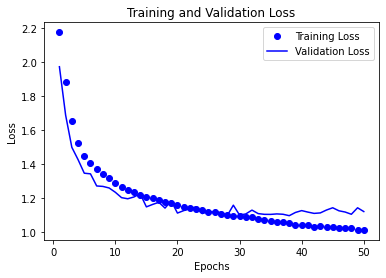

In [227]:
# create figure for training data
fig3, ax3 = plt.subplots()

# plot
ax3.plot(epochs, train_loss_values, "bo", label="Training Loss")
ax3.plot(epochs, val_loss_values, "b", label="Validation Loss")
ax3.set_title("Training and Validation Loss")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Loss")
ax3.legend()
plt.show()

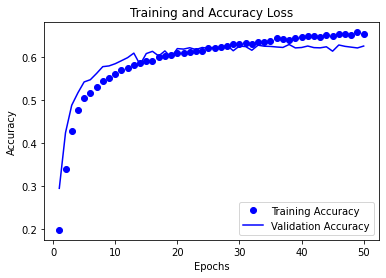

In [228]:
# create figure for training data
fig4, ax4 = plt.subplots()

# plot
ax4.plot(epochs, train_acc_values, "bo", label="Training Accuracy")
ax4.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
ax4.set_title("Training and Accuracy Loss")
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Accuracy")
ax4.legend()
plt.show()

In [229]:
# print final results
results = model.evaluate(test_images, test_labels)
print(f'Network loss:     {results[0]}')
print(f'Network accuracy: {results[1]}')

313/313 [==============================] - 2s 5ms/step - loss: 1.1298 - accuracy: 0.6144
Network loss:     1.1298027038574219
Network accuracy: 0.6144000291824341


In [230]:
predictions = model.predict(test_images)

In [231]:
for idx in range(10):

  print('Prediction: %i' % predictions[idx].argmax())
  print(predictions[idx][predictions[idx].argmax()]*100)

  tf.print('Truth: %i\n' % test_labels[idx])

Prediction: 1
70.19960284233093
Truth: 9

Prediction: 5
22.568653523921967
Truth: 1

Prediction: 1
51.696908473968506
Truth: 9

Prediction: 0
83.13740491867065
Truth: 0

Prediction: 0
76.10774636268616
Truth: 4

Prediction: 9
49.634477496147156
Truth: 4

Prediction: 0
99.832683801651
Truth: 2

Prediction: 2
51.832592487335205
Truth: 5

Prediction: 3
59.31263566017151
Truth: 3

Prediction: 7
49.120694398880005
Truth: 9

